In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import copy

In [95]:
df = pd.read_csv("C:\\Users\\RKRIS\\Downloads\\olympus\\july\\insurance.csv")

In [96]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [98]:
print(df.shape)

(1338, 7)


In [99]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [100]:
print(df.isnull().sum(axis=0))

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Text(0.5, 0, 'charges')

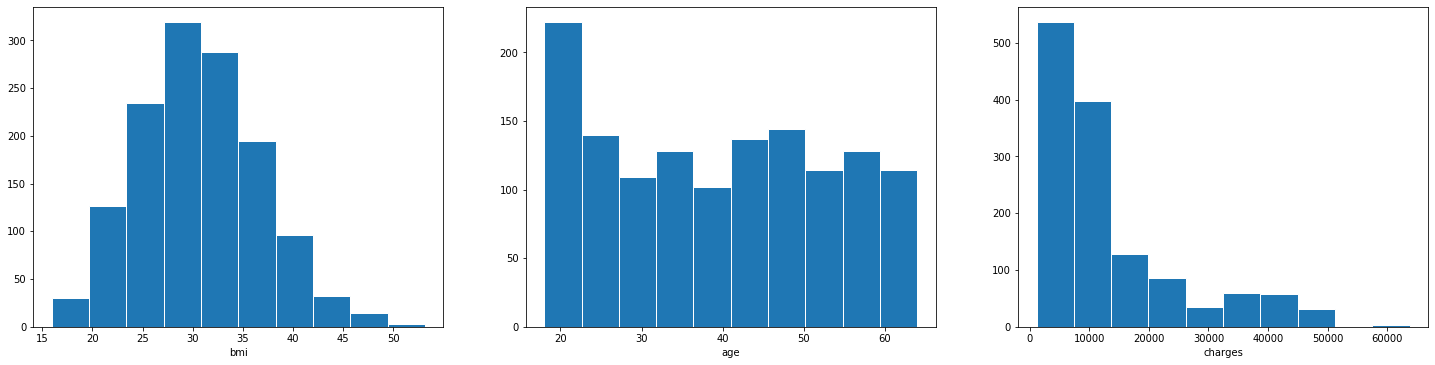

In [102]:
plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
plt.hist(df.bmi, edgecolor = 'white')
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, edgecolor = 'white')
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, edgecolor = 'white')
plt.xlabel('charges')


In [145]:
Skew = pd.DataFrame({'Skew':[stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},index=['bmi','age','charges'])
Skew

,Skew
bmi,0.283729
age,0.055610
charges,1.514180


count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


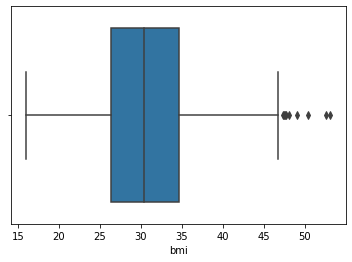

In [104]:
sns.boxplot(df['bmi'])
print(df['bmi'].describe())

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


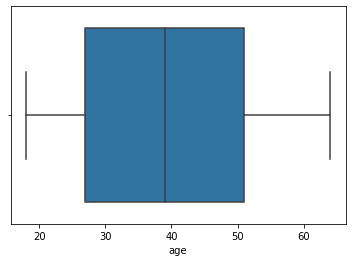

In [105]:
sns.boxplot(df['age'])
print(df['age'].describe())

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


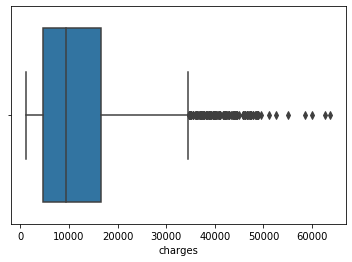

In [113]:
sns.boxplot(df['charges'])
print(df['charges'].describe())

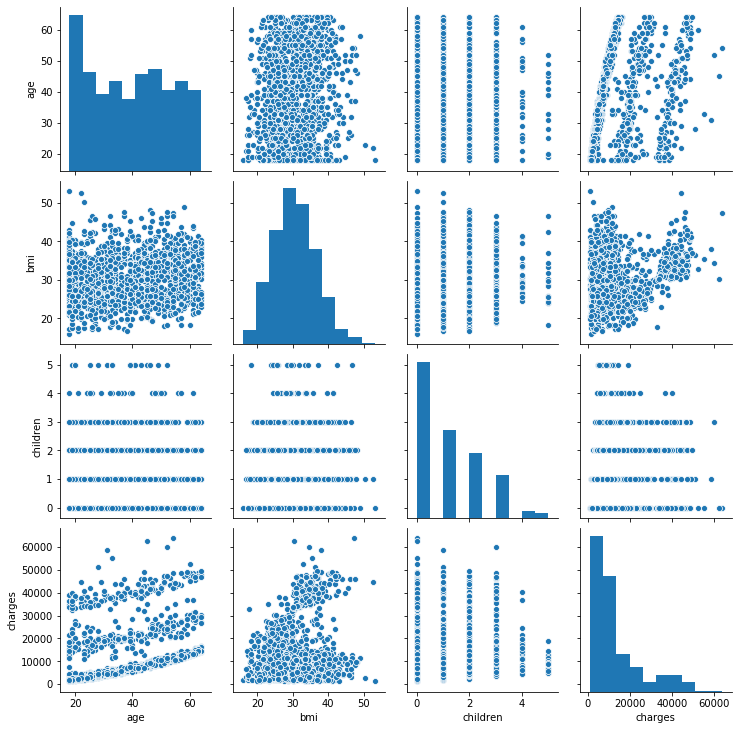

In [114]:
sns.pairplot(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']])

no     1064
yes     274
Name: smoker, dtype: int64


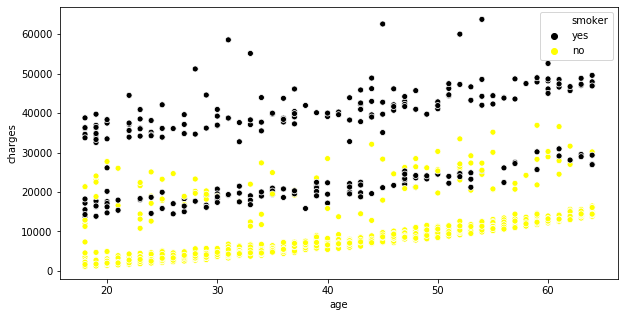

Charges smoker/non-smoker are not same as the p_value (8.271435842177219e-283) < 0.05


In [123]:
#Do charges of people who smoke differ significantly from the people who don't?

print(df.smoker.value_counts())

plt.figure(figsize=(10,5))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['black','yellow'])
plt.show()

Ha = "Charges smoker/non-smoker are not same"
Ho = "Charges smoker/non-smoker are same"

x = np.array(df[df.smoker =='yes'].charges)
y = np.array(df[df.smoker =='no'].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)
if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

male      676
female    662
Name: sex, dtype: int64


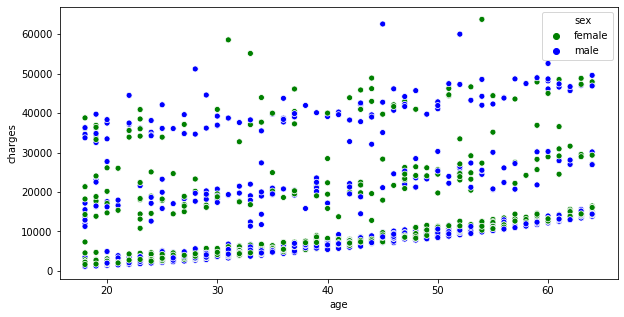

Gender has no effect on bmi as the p_value (0.09) > 0.05


In [127]:
#Does bmi of males differ significantly from that of females?

print(df.sex.value_counts())
plt.figure(figsize=(10,5))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['green','blue'] )
plt.show()

Ha = "Gender has an effect on bmi"
Ho = "Gender has no effect on bmi" 


x = np.array(df[df.sex == 'male'].bmi)
y = np.array(df[df.sex == 'female'].bmi)

t, p_value  = stats.ttest_ind(x,y, axis = 0)
if p_value < 0.05:
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


In [135]:
#Is the proportion of smokers significantly different in different genders?

Ha = "Gender has an effect on smoking"
Ho = "Gender has no effect on smoking"

crosstab = pd.crosstab(df['sex'],df['smoker'])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
(crosstab)

Gender has an effect on smoking as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [138]:
# Is the distribution of bmi across women with no children, one child and two children, the same ?

Ha = "Number of children has an effect on bmi"
Ho = "Number of children has no effect on bmi"

female = copy.deepcopy(df[df['sex'] == 'female'])

zero = female[female.children == 0]['bmi']
one = female[female.children == 1]['bmi']
two = female[female.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05: 
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


Number of children has no effect on bmi as the p_value (0.716) > 0.05
